<a href="https://colab.research.google.com/github/Khyati14001/GujHandwriting-Prediction/blob/master/GujCharacter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  **GujaratiHandwritten Character Prediction using CNN**


In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.applications import MobileNetV2 ## mobilenetv2 cnn architecture

In [ ]:
pre_trained_model = MobileNetV2(include_top=False, pooling='avg')

In [ ]:
pre_trained_model.trainable = False

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [ ]:
train_data_location = '/content/drive/MyDrive/Dataset_Sample/training'
train_data = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(train_data_location,target_size=(200,200))

Found 11 images belonging to 7 classes.


In [ ]:
validation_data_location='/content/drive/MyDrive/Dataset_Sample/validation'
validation_data = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(train_data_location,target_size=(200,200))


In [ ]:
class_mappings = train_data.class_indices
print(class_mappings)

{'.ipynb_checkpoints': 0, '6': 1, 'ek': 2, 'ka': 3, 'kha': 4, 'o': 5, 'sha': 6}


Model


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
## layer 1
model = Sequential()
model.add(pre_trained_model)
model.add(Dense(len(class_mappings),activation='softmax'))

## layer2
model = Sequential()
model.add(pre_trained_model)
model.add(Dense(len(class_mappings),activation='softmax'))

##layer3
model = Sequential()
model.add(pre_trained_model)
model.add(Dense(len(class_mappings),activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 8967      
Total params: 2,266,951
Trainable params: 8,967
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
model_fit = model.fit(train_data, epochs= 20, validation_data= validation_data)

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 0.7307 - accuracy: 0.0909 - val_loss: 0.5590 - val_accuracy: 0.0909
Epoch 2/20
1/1 [==============================] - 1s 577ms/step - loss: 0.5590 - accuracy: 0.0909 - val_loss: 0.4593 - val_accuracy: 0.0909
Epoch 3/20
1/1 [==============================] - 1s 574ms/step - loss: 0.4593 - accuracy: 0.0909 - val_loss: 0.4048 - val_accuracy: 0.2727
Epoch 4/20
1/1 [==============================] - 1s 571ms/step - loss: 0.4048 - accuracy: 0.2727 - val_loss: 0.3724 - val_accuracy: 0.3636
Epoch 5/20
1/1 [==============================] - 1s 574ms/step - loss: 0.3724 - accuracy: 0.3636 - val_loss: 0.3482 - val_accuracy: 0.5455
Epoch 6/20
1/1 [==============================] - 1s 585ms/step - loss: 0.3482 - accuracy: 0.5455 - val_loss: 0.3256 - val_accuracy: 0.6364
Epoch 7/20
1/1 [==============================] - 1s 586ms/step - loss: 0.3256 - accuracy: 0.6364 - val_loss: 0.3023 - val_accuracy: 0.7273
Epoch 8/20
1/1 [=======

Saving the model 

In [ ]:
model.save('/content/drive/MyDrive/Dataset_Sample')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset_Sample/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dataset_Sample/assets


In [ ]:
model.save('/content/drive/MyDrive/Dataset_Sample.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Using the model for prediction

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


In [ ]:

model = load_model('/content/drive/MyDrive/Dataset_Sample')

Gujarati character is:શે


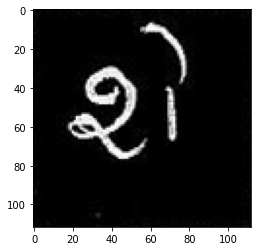

In [ ]:
test_image = image.load_img('/content/drive/MyDrive/Dataset_Sample/training/sha/28227.png')
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
test_image = preprocess_input(test_image)
result = model.predict(test_image)

predicted_class = np.argmax(result)


if predicted_class == 0:
  print('Gujarati character is:૬')
if predicted_class == 1:
    print("Gujarati character is:૧")
if predicted_class == 2:
  print("Gujarati character is:ક")
if predicted_class == 3:
    print("Gujarati character is:ઔ")
if predicted_class == 4:
    print("Gujarati character is:શે")
if predicted_class == 5:
    print("Gujarati character is:ખ")